<a href="https://colab.research.google.com/github/sipocz/_dengue/blob/main/_dengue_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:

#_Dengue
_project="_dengue"
_PCVERSION_=False
_GITHUBVERSION_=True
_GOOGLEVERSION_=False
if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub"

if _GOOGLEVERSION_:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI"

if _GITHUBVERSION_:
    !mkdir _dengue
    files=["dengue_features_train.csv","dengue_labels_train.csv","dengue_features_test.csv","/models/'model___79_0.04485_0.02581_.hdf5'"]
    path="https://raw.githubusercontent.com/sipocz/_dengue/main/"
    basedir="./"
    storeto=basedir+_project
    for f in files:
        fname=path+f
        !rm $f
        !wget $fname
        !mv $f $storeto



mkdir: cannot create directory ‘_dengue’: File exists
rm: cannot remove 'dengue_features_train.csv': No such file or directory
--2021-08-06 20:33:31--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_features_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287139 (280K) [text/plain]
Saving to: ‘dengue_features_train.csv’

dengue_features_tra 100%[===================>] 280.41K  --.-KB/s    in 0.01s   

2021-08-06 20:33:31 (22.9 MB/s) - ‘dengue_features_train.csv’ saved [287139/287139]

rm: cannot remove 'dengue_labels_train.csv': No such file or directory
--2021-08-06 20:33:32--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_labels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.13

In [118]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#--------------
def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")

features_train=basedir+_project+"/"+"dengue_features_train.csv"
labels_train=basedir+_project+"/"+"dengue_labels_train.csv"
features_test=basedir+_project+"/"+"dengue_features_test.csv"


X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_test=pd.read_csv(features_test)








In [119]:
X_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [120]:
X_test.fillna(method="bfill", inplace=True)
X_train.fillna(method="bfill", inplace=True)


In [121]:
X_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [122]:
len(list(X_test[X_test.isnull().T.any().T]))

24

In [123]:
X_test[X_test.isnull().T.any().T].head(124)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


In [124]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [125]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [126]:
X_train["total_cases"]=y_train["total_cases"]

In [127]:

X_train_sj=X_train[X_train.city == "sj"]
X_train_iq=X_train[X_train.city == "iq"]


In [128]:

X_test_sj=X_test[X_test.city == "sj"]
X_test_iq=X_test[X_test.city == "iq"]

In [129]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [130]:
print(X_train_sj.head())
print(X_train_sj.tail())


  city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]
    city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
931   sj  2008          13  ...               21.1                1.8            4
932   sj  2008          14  ...               22.2                0.5            3
933   sj  2008          15  ...               21.7               30.7            1
934   sj  2008          16  ...               21.7               11.2            3
935   sj  2008          17  ...               23.3                0.3       

In [131]:
print(X_test_sj.head())
print(X_test_sj.tail())

  city  year  ...  station_min_temp_c station_precip_mm
0   sj  2008  ...                21.7              75.2
1   sj  2008  ...                22.2              34.3
2   sj  2008  ...                22.8               3.0
3   sj  2008  ...                24.4               0.3
4   sj  2008  ...                23.3              84.1

[5 rows x 24 columns]
    city  year  ...  station_min_temp_c station_precip_mm
255   sj  2013  ...                22.8               3.5
256   sj  2013  ...                22.8              17.6
257   sj  2013  ...                23.3               9.4
258   sj  2013  ...                23.9              22.9
259   sj  2013  ...                21.7              47.5

[5 rows x 24 columns]


In [132]:
X_train.week_start_date.convert_dtypes()


0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: string

In [133]:
correlation=X_train_sj.corr()

In [134]:
correlation["ndvi_se"]

year                                    -0.021660
weekofyear                              -0.004102
ndvi_ne                                  0.226655
ndvi_nw                                  0.198294
ndvi_se                                  1.000000
ndvi_sw                                  0.821493
precipitation_amt_mm                    -0.115958
reanalysis_air_temp_k                   -0.009453
reanalysis_avg_temp_k                   -0.007267
reanalysis_dew_point_temp_k             -0.057574
reanalysis_max_air_temp_k               -0.001844
reanalysis_min_air_temp_k               -0.039837
reanalysis_precip_amt_kg_per_m2         -0.127393
reanalysis_relative_humidity_percent    -0.110548
reanalysis_sat_precip_amt_mm            -0.115958
reanalysis_specific_humidity_g_per_kg   -0.053207
reanalysis_tdtr_k                        0.027920
station_avg_temp_c                      -0.049498
station_diur_temp_rng_c                  0.022365
station_max_temp_c                      -0.055438


In [135]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Text(0, 0, 'Hubert')

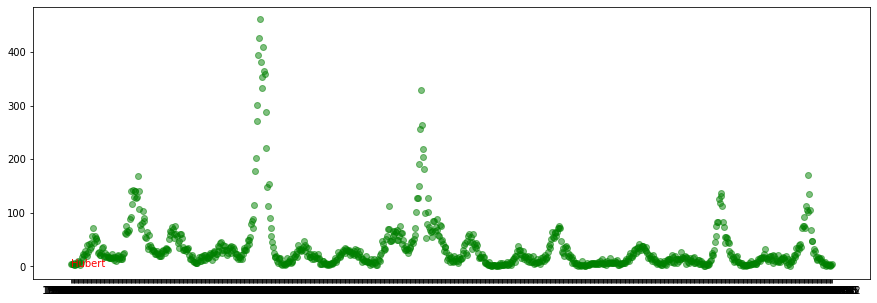

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(X_train_sj["week_start_date"],X_train_sj["total_cases"],c="green",alpha=0.5)
#plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")

In [137]:
!rm visual_view.py
!wget https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
grafikon=None
from visual_view import grafikon
help(grafikon)

--2021-08-06 20:33:44--  https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027 (1.0K) [text/plain]
Saving to: ‘visual_view.py’

visual_view.py      100%[===================>]   1.00K  --.-KB/s    in 0s      

2021-08-06 20:33:45 (68.1 MB/s) - ‘visual_view.py’ saved [1027/1027]

Help on function grafikon in module visual_view:

grafikon(fx, desc1, txt1, desc2='', txt2='', ngraf=2, c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)', title=None)
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title



In [138]:
grafikon(X_train_sj,"total_cases","total_cases",ngraf=1,title="Adatok")

In [139]:
def grafikon(fx,ind,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,0,0.8)',title=None):
    '''
    fx: dataFrame
    ind: index
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1)
    
    if True:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),

            row=1, col=1

        )
    
    if ngraf>1:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),

            row=1, col=1
        )
    if ngraf>2:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc3], name=txt3, line=dict(color=c3) ,showlegend=True  ),

            row=1, col=1
        )



    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    fig0.show()

In [140]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","reanalysis_relative_humidity_percent","reanalysis_relative_humidity_percent","station_avg_temp_c","station_avg_temp_c",ngraf=3,title="Adatok")

In [141]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

In [142]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df=X_train_sj

data1 = seasonal_decompose(df["total_cases"][0:-1].values,model="additive", freq=51,) # 5 percenként vannak a minták
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=df.index[0:-1], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.observed,name="Observed"),

    row=4, col=1
)

fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig2.show()



In [143]:
X_train_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [144]:
prediktorok=['weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [145]:
X_train_sj.isnull().sum()


city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [146]:
X_train_sj.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
from sklearn.linear_model import Lasso




alpha=0.00001
lassoreg = Lasso(alpha=alpha,normalize=False, max_iter=500, tol=0.0001)
lassoreg.fit(X_train_sj[prediktorok],X_train_sj[['total_cases']])
y_pred = lassoreg.predict(X_train_sj[prediktorok])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049663.845683744, tolerance: 246.84424861111117



In [148]:
y_pred=y_pred.T

In [149]:
X_train_sj["pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","pred","pred",title="prediction",)

Ez a LAsso nem valami szép

In [151]:
X_train_sj.tail(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314
934,sj,2008,16,2008-04-15,0.00180,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,-0.338400


SJ random forest

In [152]:

from sklearn.ensemble import RandomForestRegressor

total_regressor=RandomForestRegressor(n_estimators=1540,criterion="mse",)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
X_train_sj.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978,6.164286
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381,4.881818
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314,4.103247
934,sj,2008,16,2008-04-15,0.00180,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865,4.194156
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,-0.338400,6.799351


In [154]:


from sklearn.ensemble import GradientBoostingRegressor

total_regressor=GradientBoostingRegressor(n_estimators=2000,verbose=1)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        2328.3095           10.07s
         2        2077.8591           10.46s
         3        1866.2682           10.56s
         4        1700.4436           10.55s
         5        1559.4057           10.57s
         6        1449.7633           10.56s
         7        1355.3893           10.56s
         8        1280.3956           10.55s
         9        1216.0761           10.62s
        10        1163.1555           10.60s
        20         877.9643           10.35s
        30         759.3513           10.23s
        40         671.4250           10.30s
        50         592.1514           10.20s
        60         540.1539           10.14s
        70         481.2859           10.14s
        80         435.7583           10.15s
        90         404.6136           10.15s
       100         373.9880           10.05s
       200         179.0351            9.49s
       300          98.3384            8.90s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","Randomforest_total","Randomforest_total",title="GradientBoostingRegressor",)

In [156]:
X_train_train=X_train_sj[X_train_sj.index<900]
X_train_test=X_train_sj[X_train_sj.index>900]

from sklearn.ensemble import GradientBoostingRegressor

train_regressor=GradientBoostingRegressor(n_estimators=100,verbose=1)

yy=X_train_train[['total_cases']]
train_regressor.fit(X_train_train[prediktorok],yy)
y_pred=train_regressor.predict(X_train_train[prediktorok])

X_train_train["gradientboosting_total"]=y_pred


y_pred=train_regressor.predict(X_train_test[prediktorok])

X_train_test["gradientboosting_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        2323.9254            0.50s
         2        2050.1281            0.53s
         3        1826.6552            0.52s
         4        1645.6523            0.52s
         5        1496.4443            0.52s
         6        1375.5050            0.51s
         7        1277.2564            0.51s
         8        1196.9073            0.50s
         9        1131.2690            0.50s
        10        1078.9543            0.50s
        20         801.3540            0.42s
        30         682.9960            0.36s
        40         622.8671            0.33s
        50         548.9765            0.27s
        60         484.2472            0.22s
        70         448.5072            0.16s
        80         412.9292            0.11s
        90         378.1483            0.05s
       100         344.1080            0.00s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
grafikon(X_train_test,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

In [158]:
grafikon(X_train_train,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

-Na-  estimation: Próbáljuk megbecsülni a hiányzó adatokat.

In [159]:
ndv=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]

In [160]:
XX_ndv=X_train_sj[ndv]

In [161]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340
...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243
932,-0.038000,-0.016833,0.119371,0.066386
933,-0.155200,-0.052750,0.137757,0.141214
934,0.001800,-0.010367,0.203900,0.209843


In [162]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [163]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

ne_regressor=GradientBoostingRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_ne']]
ne_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [164]:
XX_ndv["ne_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
XX_ndv.head(10)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred
0,0.122600,0.103725,0.198483,0.177617,0.077695
1,0.169900,0.142175,0.162357,0.155486,0.116948
2,0.032250,0.172967,0.157200,0.170843,0.110966
3,0.128633,0.245067,0.227557,0.235886,0.165768
4,0.196200,0.262200,0.251200,0.247340,0.212346
5,0.112900,0.174850,0.254314,0.181743,0.123775
6,0.112900,0.092800,0.205071,0.210271,0.072419
7,0.072500,0.072500,0.151471,0.133029,0.036027
8,0.102450,0.146175,0.125571,0.123600,0.102376
9,0.192875,0.121550,0.160683,0.202567,0.114485


In [166]:
XX_ndv["ssz"]=XX_ndv.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
grafikon(XX_ndv,"ssz","ndvi_ne","ndvi_ne","ne_pred","ne_pred",ngraf=2,title="NDVI_NE")

Gradient boosting NDVI

In [168]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
...,...,...,...,...,...,...
931,0.077850,-0.039900,0.310471,0.296243,0.006629,931
932,-0.038000,-0.016833,0.119371,0.066386,0.012577,932
933,-0.155200,-0.052750,0.137757,0.141214,-0.055727,933
934,0.001800,-0.010367,0.203900,0.209843,0.013797,934


In [169]:
ne_regressor=GradientBoostingRegressor(n_estimators=3900,verbose=1)
X_ndv=XX_ndv[XX_ndv.index<800]
X_ndv_test=XX_ndv[XX_ndv.index>=800]

ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]
yy=X_ndv[['ndvi_ne']]

ne_regressor.fit(X_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(X_ndv[ndv_features])
X_ndv["gradientboosting_ne"]=y_pred

y_pred=ne_regressor.predict(X_ndv_test[ndv_features])
X_ndv_test["gradientboosting_ne"]=y_pred



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1           0.0107            4.50s
         2           0.0100            4.99s
         3           0.0094            5.18s
         4           0.0088            5.19s
         5           0.0084            5.19s
         6           0.0079            5.19s
         7           0.0076            5.18s
         8           0.0073            5.17s
         9           0.0071            5.16s
        10           0.0068            5.16s
        20           0.0056            5.80s
        30           0.0051            5.39s
        40           0.0047            5.09s
        50           0.0045            4.90s
        60           0.0042            4.81s
        70           0.0040            4.73s
        80           0.0038            4.65s
        90           0.0036            4.60s
       100           0.0035            4.55s
       200           0.0022            4.36s
       300           0.0016            4.13s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
grafikon(X_ndv,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")
grafikon(X_ndv_test,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")


In [171]:
ndv_features=['ndvi_ne',"ndvi_se","ndvi_sw"]


In [172]:
XX_ndv.head(8)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
5,0.112900,0.174850,0.254314,0.181743,0.123775,5
6,0.112900,0.092800,0.205071,0.210271,0.072419,6
7,0.072500,0.072500,0.151471,0.133029,0.036027,7


In [173]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [174]:
XX_ndv.head(8)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz
0,0.122600,0.103725,0.198483,0.177617,0.077695,0
1,0.169900,0.142175,0.162357,0.155486,0.116948,1
2,0.032250,0.172967,0.157200,0.170843,0.110966,2
3,0.128633,0.245067,0.227557,0.235886,0.165768,3
4,0.196200,0.262200,0.251200,0.247340,0.212346,4
5,0.112900,0.174850,0.254314,0.181743,0.123775,5
6,0.112900,0.092800,0.205071,0.210271,0.072419,6
7,0.072500,0.072500,0.151471,0.133029,0.036027,7


In [175]:
X_train_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,22.887066,4.272749
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,36.431284,4.967420
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,15.775733,4.463777
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,29.978724,3.373866
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,41.577538,5.996296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978,3.888153
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381,3.304613
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314,1.218775
934,sj,2008,16,2008-04-15,0.001800,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865,3.555865


In [176]:
# a if C else b for i in items

In [177]:
X_train_sj["ndvi_neN"]=[abs(x) if x<0 else 0 for x in list(X_train_sj["ndvi_ne"]) ]
X_train_sj["ndvi_neP"]=[abs(x) if x>0 else 0 for x in list(X_train_sj["ndvi_ne"]) ]

X_train_sj["ndvi_nwN"]=[abs(x) if x<0 else 0 for x in list(X_train_sj["ndvi_nw"]) ]
X_train_sj["ndvi_nwP"]=[abs(x) if x>0 else 0 for x in list(X_train_sj["ndvi_nw"]) ]

X_train_sj["ndvi_seN"]=[abs(x) if x<0 else 0 for x in list(X_train_sj["ndvi_se"]) ]
X_train_sj["ndvi_seP"]=[abs(x) if x>0 else 0 for x in list(X_train_sj["ndvi_se"]) ]

X_train_sj["ndvi_swN"]=[abs(x) if x<0 else 0 for x in list(X_train_sj["ndvi_sw"]) ]
X_train_sj["ndvi_swP"]=[abs(x) if x>0 else 0 for x in list(X_train_sj["ndvi_sw"]) ]





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [178]:
X_train_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total,ndvi_neN,ndvi_neP,ndvi_nwN,ndvi_nwP,ndvi_seN,ndvi_seP,ndvi_swN,ndvi_swP
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,22.887066,4.272749,0.0000,0.122600,0.000000,0.103725,0.0,0.198483,0.0,0.177617
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,36.431284,4.967420,0.0000,0.169900,0.000000,0.142175,0.0,0.162357,0.0,0.155486
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,15.775733,4.463777,0.0000,0.032250,0.000000,0.172967,0.0,0.157200,0.0,0.170843
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,29.978724,3.373866,0.0000,0.128633,0.000000,0.245067,0.0,0.227557,0.0,0.235886
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,41.577538,5.996296,0.0000,0.196200,0.000000,0.262200,0.0,0.251200,0.0,0.247340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,33.697978,3.888153,0.0000,0.077850,0.039900,0.000000,0.0,0.310471,0.0,0.296243
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1.658381,3.304613,0.0380,0.000000,0.016833,0.000000,0.0,0.119371,0.0,0.066386
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1.736314,1.218775,0.1552,0.000000,0.052750,0.000000,0.0,0.137757,0.0,0.141214
934,sj,2008,16,2008-04-15,0.001800,-0.010367,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,12.409865,3.555865,0.0000,0.001800,0.010367,0.000000,0.0,0.203900,0.0,0.209843


### LSTM NDVI 3 előző NDVi--> NDVI aktual

In [179]:
ndv_features=[ 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',"total_cases",'ndvi_neP', 'ndvi_nwP','ndvi_seP', 'ndvi_swP','ndvi_neN', 'ndvi_nwN','ndvi_seN', 'ndvi_swN']

In [180]:
def build_training_data(dataset, history_size = 5, target_size = 23):
    '''
    source: https://www.mikulskibartosz.name/how-to-split-a-data-frame-into-time-series-for-lstm-deep-neural-network/
    '''
    start_index = history_size
    end_index = len(dataset) - target_size

    data = []
    labels = []

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, 1)
        #print(indices)
        data.append(dataset.iloc[indices])
        labels.append(dataset.iloc[i:i + target_size])

    data = np.array(data)
    labels = np.array(labels)
    data = data.reshape((-1,  history_size,4))
    labels = labels.reshape((-1, target_size,4))
    return data, labels

def build_training_data_Xy(X,y, history_size = 52, target_size = 52):
    '''
    source: https://www.mikulskibartosz.name/how-to-split-a-data-frame-into-time-series-for-lstm-deep-neural-network/
    '''
    start_index = history_size
    end_index = len(X) - target_size

    data = []
    labels = []

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, 1)
        #print(indices)
        data.append(X.iloc[indices])
        labels.append(y.iloc[i:i + target_size])

    data = np.array(data)
    labels = np.array(labels)
    data = data.reshape((-1,  history_size,len(XX_ndvi.columns)))
    labels = labels.reshape((-1, target_size,1))
    return data, labels





#ndv_features=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]
XX_ndvi=X_train_sj[ndv_features]
x_scaler = MinMaxScaler()
XX_ndvi_scale = pd.DataFrame(x_scaler.fit_transform(XX_ndvi))
XX_ndvi_scale.columns=XX_ndvi.columns

X_train_sj_i=X_train_sj[["total_cases"]].diff()
y_scaler=MinMaxScaler()
X_train_sj_i_scale=pd.DataFrame(y_scaler.fit_transform(X_train_sj_i))

XX_ndvi.reset_index(drop=True, inplace=True)
print(XX_ndvi)
data, labels = build_training_data_Xy(XX_ndvi_scale,X_train_sj_i_scale)



     precipitation_amt_mm  reanalysis_air_temp_k  ...  ndvi_seN  ndvi_swN
0                   12.42             297.572857  ...       0.0       0.0
1                   22.82             298.211429  ...       0.0       0.0
2                   34.54             298.781429  ...       0.0       0.0
3                   15.36             298.987143  ...       0.0       0.0
4                    7.52             299.518571  ...       0.0       0.0
..                    ...                    ...  ...       ...       ...
931                 27.19             296.958571  ...       0.0       0.0
932                  3.82             298.081429  ...       0.0       0.0
933                 16.96             297.460000  ...       0.0       0.0
934                  0.00             297.630000  ...       0.0       0.0
935                  0.00             298.672857  ...       0.0       0.0

[936 rows x 25 columns]


In [181]:
print(X_train_sj[["total_cases"]].diff().fillna(value=0))

     total_cases
0            0.0
1            1.0
2           -1.0
3           -1.0
4            3.0
..           ...
931          1.0
932         -1.0
933         -2.0
934          2.0
935          2.0

[936 rows x 1 columns]


In [182]:
labels

array([[[0.47428571],
        [0.44      ],
        [0.49714286],
        ...,
        [0.46857143],
        [0.45714286],
        [0.44      ]],

       [[0.44      ],
        [0.49714286],
        [0.42857143],
        ...,
        [0.45714286],
        [0.44      ],
        [0.47428571]],

       [[0.49714286],
        [0.42857143],
        [0.49714286],
        ...,
        [0.44      ],
        [0.47428571],
        [0.49714286]],

       ...,

       [[0.52571429],
        [0.41714286],
        [0.45142857],
        ...,
        [0.47428571],
        [0.47428571],
        [0.46285714]],

       [[0.41714286],
        [0.45142857],
        [0.52      ],
        ...,
        [0.47428571],
        [0.46285714],
        [0.45714286]],

       [[0.45142857],
        [0.52      ],
        [0.45714286],
        ...,
        [0.46285714],
        [0.45714286],
        [0.48      ]]])

In [183]:
len(labels)

832

In [184]:
len(data)

832

In [185]:
data[1]

array([[0.05842294, 0.36299338, 0.38488784, ..., 0.        , 0.        ,
        0.        ],
       [0.08842806, 0.45402692, 0.45690673, ..., 0.        , 0.        ,
        0.        ],
       [0.03932412, 0.48688113, 0.51475797, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1141065 , 0.21492129, 0.21133412, ..., 0.        , 0.        ,
        0.        ],
       [0.08376856, 0.34109058, 0.35064935, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.46201232, 0.48878394, ..., 0.        , 0.        ,
        0.        ]])

In [186]:
labels[1]

array([[0.44      ],
       [0.49714286],
       [0.42857143],
       [0.49714286],
       [0.49142857],
       [0.48      ],
       [0.42857143],
       [0.49142857],
       [0.44      ],
       [0.47428571],
       [0.49142857],
       [0.49714286],
       [0.48      ],
       [0.68      ],
       [0.45714286],
       [0.56      ],
       [0.41142857],
       [0.45714286],
       [0.49142857],
       [0.58857143],
       [0.48571429],
       [0.74285714],
       [0.33142857],
       [0.61714286],
       [0.39428571],
       [0.53142857],
       [0.46857143],
       [0.39428571],
       [0.48      ],
       [0.69714286],
       [0.30857143],
       [0.28      ],
       [0.29714286],
       [0.42285714],
       [0.53142857],
       [0.6       ],
       [0.38857143],
       [0.44      ],
       [0.29714286],
       [0.45714286],
       [0.53714286],
       [0.28571429],
       [0.49714286],
       [0.58857143],
       [0.36      ],
       [0.45142857],
       [0.42285714],
       [0.474

In [187]:
labels[0]

array([[0.47428571],
       [0.44      ],
       [0.49714286],
       [0.42857143],
       [0.49714286],
       [0.49142857],
       [0.48      ],
       [0.42857143],
       [0.49142857],
       [0.44      ],
       [0.47428571],
       [0.49142857],
       [0.49714286],
       [0.48      ],
       [0.68      ],
       [0.45714286],
       [0.56      ],
       [0.41142857],
       [0.45714286],
       [0.49142857],
       [0.58857143],
       [0.48571429],
       [0.74285714],
       [0.33142857],
       [0.61714286],
       [0.39428571],
       [0.53142857],
       [0.46857143],
       [0.39428571],
       [0.48      ],
       [0.69714286],
       [0.30857143],
       [0.28      ],
       [0.29714286],
       [0.42285714],
       [0.53142857],
       [0.6       ],
       [0.38857143],
       [0.44      ],
       [0.29714286],
       [0.45714286],
       [0.53714286],
       [0.28571429],
       [0.49714286],
       [0.58857143],
       [0.36      ],
       [0.45142857],
       [0.422

In [188]:
from keras.backend import clear_session
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Flatten,Bidirectional
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta,Adagrad,Nadam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
#import tensorflow_addons as tfa

In [189]:
#.LSTM(units, input_shape=(timesteps, features))])

In [190]:
clear_session() 
dropout_1_rate=0.1
input_size=52 # timesteps
output_size=25 # features
learning_rate=0.0006

inputs=Input(shape=(input_size,25))
lstm1=LSTM(input_size,return_sequences=False,dropout=0.4,recurrent_dropout=0.4)(inputs)
o1=Dense(123,activation="relu",)(lstm1)



result=Dense(52,activation="relu",)(o1)
#dropout1=Dropout(rate=dropout_1_rate)(layer2)
#result=Dense(output_size,activation="sigmoid")(dropout1)

model = Model(inputs=inputs, outputs=result)
model.compile(optimizer=Adamax(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52, 25)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 52)                16224     
_________________________________________________________________
dense (Dense)                (None, 123)               6519      
_________________________________________________________________
dense_1 (Dense)              (None, 52)                6448      
Total params: 29,191
Trainable params: 29,191
Non-trainable params: 0
_________________________________________________________________


In [191]:
!rm model*

In [192]:
fname="./model__"
callbacks = [#callback_LR,
       
        ModelCheckpoint(filepath=fname+"_{epoch}"+"_{loss:.5f}_{val_loss:.5f}_.hdf5", monitor='val_loss',
                        verbose=2, save_best_only=True, mode='min')]

In [205]:
history = model.fit(
    x=data,
    y=labels,
    validation_split=0.1,
    epochs=100,
    batch_size=1,
    callbacks=callbacks,shuffle=False
   )

Epoch 1/100
748/748 [==============================] - 20s 26ms/step - loss: 0.0947 - val_loss: 0.0917

Epoch 00001: val_loss did not improve from 0.08980
Epoch 2/100
748/748 [==============================] - 19s 26ms/step - loss: 0.0947 - val_loss: 0.0902

Epoch 00002: val_loss did not improve from 0.08980
Epoch 3/100
748/748 [==============================] - 19s 26ms/step - loss: 0.0945 - val_loss: 0.0903

Epoch 00003: val_loss did not improve from 0.08980
Epoch 4/100
748/748 [==============================] - 20s 26ms/step - loss: 0.0946 - val_loss: 0.0907

Epoch 00004: val_loss did not improve from 0.08980
Epoch 5/100
748/748 [==============================] - 20s 26ms/step - loss: 0.0946 - val_loss: 0.0901

Epoch 00005: val_loss did not improve from 0.08980
Epoch 6/100
748/748 [==============================] - 20s 26ms/step - loss: 0.0947 - val_loss: 0.0911

Epoch 00006: val_loss did not improve from 0.08980
Epoch 7/100
748/748 [==============================] - 20s 26ms/step -

In [195]:
model_loaded=tf.keras.models.load_model('model___91_0.09475_0.08980_.hdf5')

In [ ]:
model=tf.keras.models.load_model('model___79_0.04485_0.02581_.hdf5')

In [ ]:
#model_loaded=model

In [196]:
y_pred=model_loaded.predict(data)

In [197]:
y_pred[1]

array([0.45834884, 0.46482825, 0.46513838, 0.46065843, 0.47736982,
       0.47011566, 0.47810534, 0.        , 0.4758967 , 0.47912773,
       0.48371238, 0.48495275, 0.48162755, 0.48705786, 0.4787933 ,
       0.48679483, 0.47304827, 0.48168698, 0.4795634 , 0.4868128 ,
       0.4848775 , 0.48047876, 0.48314553, 0.46837002, 0.        ,
       0.        , 0.        , 0.47104228, 0.47286645, 0.45901763,
       0.46761566, 0.        , 0.4582667 , 0.46885613, 0.45990777,
       0.45950896, 0.45869014, 0.45586666, 0.45270658, 0.4523875 ,
       0.44474018, 0.45643687, 0.4524679 , 0.45761067, 0.        ,
       0.4565217 , 0.45209068, 0.4537379 , 0.4609104 , 0.4619521 ,
       0.4542848 , 0.45609593], dtype=float32)

In [198]:
y_pred_rescale=y_scaler.inverse_transform(y_pred)
print(y_pred_rescale[7])

[-1.7252675e+00  1.7643005e-02  3.7883997e-02 -1.2799137e+00
  1.3159193e+00  6.3943940e-01  1.5831985e+00 -8.2000000e+01
  1.9406416e+00  2.6205430e+00  4.1256151e+00  3.9991417e+00
  3.3052633e+00  3.9794431e+00  3.4605155e+00  3.9651582e+00
  1.8483707e+00  2.3747513e+00  1.7415800e+00  2.3508072e+00
  1.6550407e+00  7.7229667e-01  6.1421770e-01 -9.6210241e-01
 -8.2000000e+01 -8.2000000e+01 -8.2000000e+01 -2.1107590e+00
 -1.3027519e+00 -3.5819521e+00 -1.1856086e+00 -8.2000000e+01
 -2.3703716e+00 -8.8196766e-01 -2.1804526e+00 -1.0957785e+00
 -2.1388597e+00 -2.4840465e+00 -2.3563786e+00 -2.0668244e+00
 -3.6314256e+00 -2.8676188e+00 -3.0175357e+00 -1.4592662e+00
 -8.2000000e+01 -2.4369879e+00 -2.1522737e+00 -1.9054077e+00
 -7.2906762e-01 -1.2868189e+00 -1.2714125e+00 -1.7094022e+00]


In [199]:
def backtest(index):
    y_orig=y_scaler.inverse_transform(labels[index])
    output=pd.DataFrame( y_pred_rescale[index])
    output["a"]=y_orig.T[0]
    output.columns=["pred","orig"]
    output["index"]=range(0,52)
    grafikon(output,"index","orig","orig","pred","pred")

In [202]:
ranger= [i*50 for i in range(15)]
ranger

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]

In [204]:
for i in ranger:
    backtest(i)